In [1]:
import math

import numpy as np
import numpy.linalg as la

## Тензоры
Тензором размерности $d$ (или, чаще говорят, порядка $d$) называется $d$-мерная таблица ($d$-мерная матрица), составленная из элементов $a(i_1, ..., i_d)$. Иногда тензор размерности $d$ называется также $d$-тензором.

In [2]:
def rand_tensor(*shape):
    return np.random.rand(*shape)

def ones_tensor(*shape):
    return np.ones(shape)

def zeros_tensor(*shape):
    return np.zeros(shape)

In [3]:
print(rand_tensor(2,2,2))
print(ones_tensor(1,2,3))
print(zeros_tensor(3))

[[[0.24364738 0.25376372]
  [0.10453113 0.03176863]]

 [[0.83070609 0.54559643]
  [0.78640593 0.7448374 ]]]
[[[1. 1. 1.]
  [1. 1. 1.]]]
[0. 0. 0.]


## Матрицы, ассоциированные с тензором

Для трехмерного тензора $a(i, j, k)$ размера $n_1 × n_2 × n_3$ естественным образом определяются матрицы развертки $a_1$, $a_2$ и $a_3$ по каждому из трех измерений:
$a_1[i; jk] = a_2[j; ik] = a_3[k; ij] = a[i, j, k]$.

Матрицы $a_1$, $a_2$ и $a_3$ имеют соответственно размеры $n_1 × n_2 n_3$, $n_2 × n_1 n_3$ и $n_3 × n_1 n_2$.
Точка с запятой используется, чтобы отделить строчные и столбцовые индексы
матрицы. $jk$, $ik$ и $ij$ - это составные индексы.

По определению, составной индекс $ij$ принимает столько значений, сколько имеется пар значений для $i$ и $j$. При изображении матриц в виде таблиц считается, что для составных индексов используется лексикографический порядок: в паре индексов $(i, j)$ сначала изменяется $j$, затем $i$. Если $i$ и $j$ принимают значения $1, 2, 3$ и
$1, 2$ соответственно, то пары $(i, j)$ выстраиваются в последовательность $$(1, 1), (1, 2), (2, 1), (2, 2), (3, 1), (3, 2).$$
Аналогичным образом определяется лексикографический порядок для составных индексов $ijk$, $ijkl$ и так далее.

Матрицы $a(i_1 ... i_k; i_{k+1} ... i_d)$ называются стандартными ассоциированными матрицами.

In [4]:
def unfold_tensor(tensor, rows_indexes_number=0):
    n = rows_indexes_number
    rows = int(np.product(tensor.shape[:n]))
    cols = int(np.product(tensor.shape[n:]))
    return np.reshape(tensor, (rows, cols))

def fold_matrix(matrix, shape):
    return np.reshape(matrix, shape)

In [5]:
t = np.empty((2,2,2,2), dtype=int)
for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                t[i][j][k][l] = int(f'{i + 1}{j + 1}{k + 1}{l + 1}')
print(t)

[[[[1111 1112]
   [1121 1122]]

  [[1211 1212]
   [1221 1222]]]


 [[[2111 2112]
   [2121 2122]]

  [[2211 2212]
   [2221 2222]]]]


In [6]:
m0 = unfold_tensor(t)
print(m0)

[[1111 1112 1121 1122 1211 1212 1221 1222 2111 2112 2121 2122 2211 2212
  2221 2222]]


In [7]:
m1 = unfold_tensor(t, 1)
print(m1)

[[1111 1112 1121 1122 1211 1212 1221 1222]
 [2111 2112 2121 2122 2211 2212 2221 2222]]


In [8]:
m2 = unfold_tensor(t, 2)
print(m2)

[[1111 1112 1121 1122]
 [1211 1212 1221 1222]
 [2111 2112 2121 2122]
 [2211 2212 2221 2222]]


In [9]:
m3 = unfold_tensor(t, 3)
print(m3)

[[1111 1112]
 [1121 1122]
 [1211 1212]
 [1221 1222]
 [2111 2112]
 [2121 2122]
 [2211 2212]
 [2221 2222]]


In [10]:
assert np.array_equal(fold_matrix(m0, t.shape), t)
assert np.array_equal(fold_matrix(m1, t.shape), t)
assert np.array_equal(fold_matrix(m2, t.shape), t)
assert np.array_equal(fold_matrix(m3, t.shape), t)

Норма Фробениуса одна и та же для любой матрицы, ассоциированной с одним и тем же тензором.

In [11]:
def fro(matrix):
    return la.norm(matrix, 'fro')

def dist(m1, m2):
    return fro(m1 - m2)

In [12]:
assert fro(m0) == fro(m1) == fro(m2) == fro(m3)

## Ранговые матричные разложения

Пусть $A$ - произвольная матрица размера $m\times n$ ранга $r$, тогда ранговое разложение имеет вид $A = UV$, где $U$ — матрица $m\times r$ и $V$ — матрица $r\times n$.

### Скелетное разложение
Матрица $A = a(i, j)$ с элементами вида $a[i, j] = u(i)v(j)$ называется скелетоном.
Представление матрицы в виде суммы скелетонов называется ее скелетным разложением или каноническим разложением. Сумма $r$ скелетонов определяется системами столбцов $u_1, ..., u_r$ и $v_1, ..., v_r$ и имеет вид $$A = \sum_{\alpha=1}^r u_\alpha v_\alpha^T = UV,$$
где $$U = [u_1, ..., u_r], V = [v_1, ..., v_r]^T$$
Минимально возможное число скелетонов называется рангом матрицы $a(i, j)$.

In [13]:
def skeleton_decomposition(matrix):
    raise NotImplementedError('DO IT')

### Сингулярное разложение (SVD)

Пусть имеется скелетное разложение комплексной матрицы A, записанное в виде $$A = \sum_{\alpha = 1}^r = \sigma_\alpha u_\alpha v_\alpha^*,$$
где $$\sigma_1 \ge \sigma_2 \ge ... \ge \sigma_r \ge 0$$
и каждая из систем столбцов $u_1, ..., u_r$ и $v_1, ..., v_r$ является ортонормированной при естественном скалярном произведении. Такое разложение называется сингулярным разложением матрицы $A$.

Пусть $A_k$ получается из сингулярного разложения матрицы $A$ отбрасыванием скелетонов с номерами $\alpha \ge k + 1$. Тогда
$$\min_{rankB \le k}||A - B||_2 = ||A - A_k||_2 = \sigma_{k+1},$$
$$\min_{rankB \le k}||A - B||_F = ||A - A_k||_F = \sqrt{\sum_{\alpha \ge k + 1}\sigma_\alpha^2}.$$

In [14]:
def _svd(matrix, eps=1e-6):
    u, s, v = la.svd(matrix, full_matrices=False)
    id_ = s.size
    for i, s_val in enumerate(s):
        if s_val <= eps:
            id_ = i
            break
    id_ = max(id_, 1)
    return u[:,:id_], s[:id_], v[:id_,:]

def svd_decomposition(matrix, eps=1e-6):
    u, s, v = _svd(matrix, eps)
    return u, np.diag(s) @ v

In [15]:
m = [
    [1, 0, 2, 0],
    [0, 1, 0, 3],
    [1, 1, 1, 1],
    [1, 1, 2, 3],
]

u, s, v = _svd(m)
for i in (u, s, v):
    print(i.shape)
print(s)

(4, 3)
(3,)
(3, 4)
[5.17842823 2.58487444 0.70873494]


In [16]:
u, v = svd_decomposition(m)
print(dist(m, u @ v))

2.9825620866736277e-15


In [17]:
u, v = svd_decomposition(m, eps=s[-1])
for i in (u, v):
    print(i.shape)
print(dist(m, u @ v))
print(s[-1])

(4, 2)
(2, 4)
0.7087349353283674
0.7087349353283673


In [18]:
u, v = svd_decomposition(m, eps=s[-2])
for i in (u, v):
    print(i.shape)
print(dist(m, u @ v))
print((s[-1]**2 + s[-2]**2)**0.5)

(4, 1)
(1, 4)
2.680276309338857
2.680276309338856


## Разложение в тензорный поезд

$$T(n_1, n_2, ..., n_d) = G(n_1, r_1) G(r_1, n_2, r_2) G(r_2, n_3, r_3) ... G(r_{d-2}, n_{d-1}, r_{d-1}) G(r_{d-1}, n_d)$$

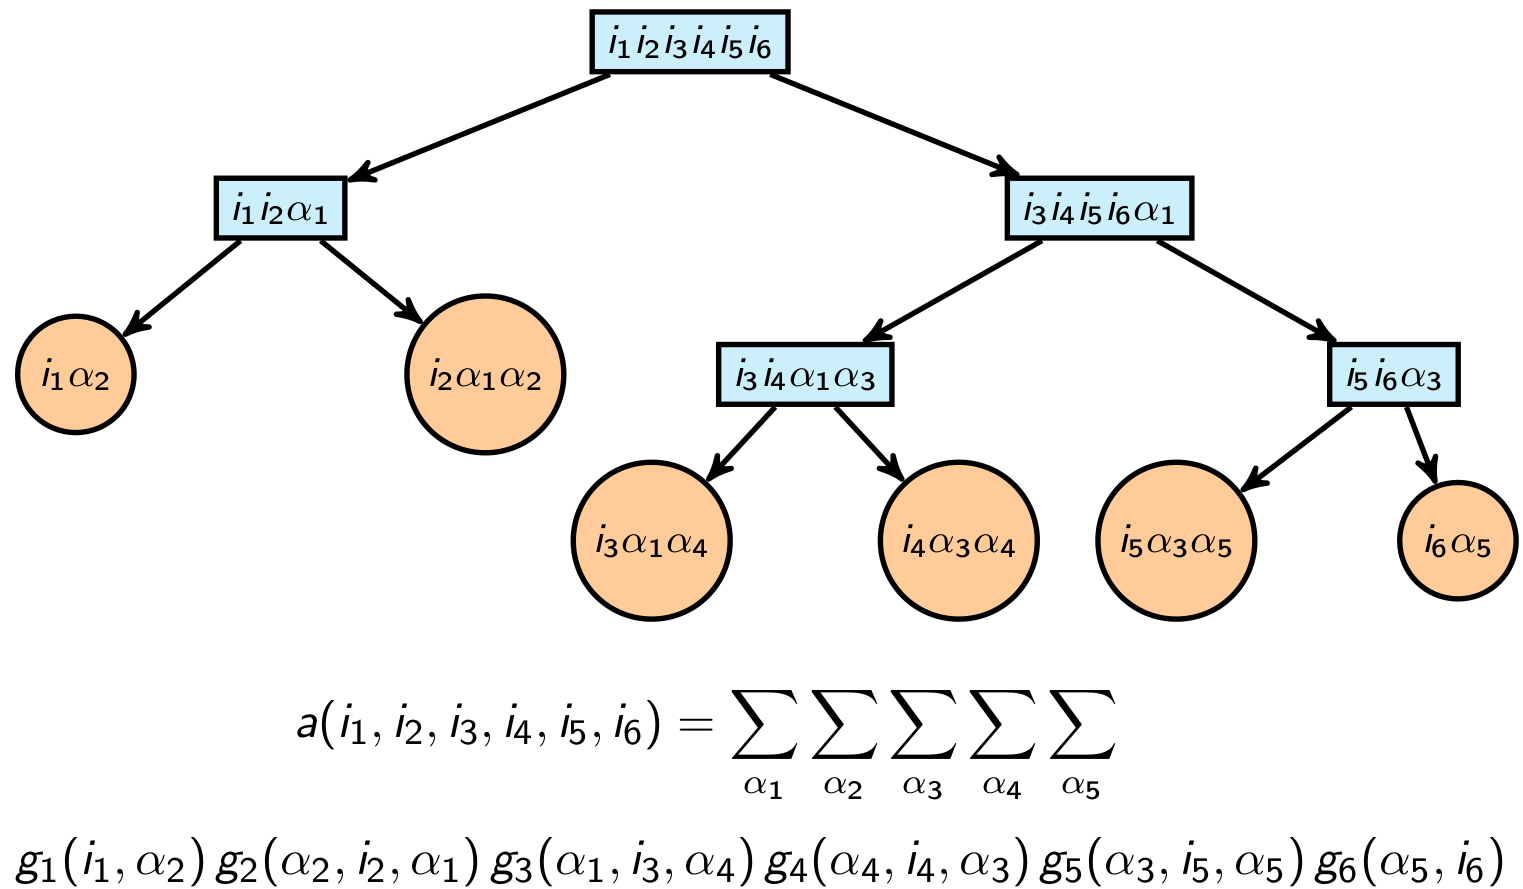

In [19]:
def tt_cores(tensor, mtrx_decomposition_func):
    """
    Decompose tensor of size (n1, n2, ..., nd) to
    list of TT cores of sizes
    [(n1, r1), (r1, n2, r2), (r2, n2, r3), ..., (rd, nd)]
    """
    decomposition = []
    
    t = tensor
    while True:
        mtrx = unfold_tensor(t, 1)
        u, v = mtrx_decomposition_func(mtrx)
        decomposition.append(u)
        
        if t.ndim == 2:
            decomposition.append(v)
            break
        
        # Get next step tensor of size (r_i * n_{i+1}, n_{i+2}, ...)
        r = v.shape[0]
        n = t.shape[1]
        t = fold_matrix(v, (r * n, *t.shape[2:]))
    
    for i in range(1, len(decomposition) - 1):
        # Transform (r_{i-1} * n_i, r_i) matrix
        # to (r_{i-1}, n_i, r_i) tensor
        prev_r = decomposition[i - 1].shape[-1]
        r = decomposition[i].shape[1]
        n = decomposition[i].shape[0] // prev_r
        u = fold_matrix(decomposition[i], (prev_r, n, r))
        decomposition[i] = u

    return decomposition


def from_tt_cores(cores):
    cores_iterator = iter(cores)
    tensor = next(cores_iterator)
    for core in cores_iterator:
        # Dot product over rank indexes
        # of tensor of size (n_1, ..., n_{i-1}, r_{i-1})
        # and core of size (r_{i-1}, n_i, r_i)
        # Result is a tensor of size (n_1, ..., n_{i-1}, n_i, r_i)
        tensor = np.tensordot(tensor, core, axes=([-1], [0]))
    return tensor

In [20]:
t = ones_tensor(2,2,2,2,2)
cores = tt_cores(t, svd_decomposition)
for c in cores:
    print(c.shape)

(2, 1)
(1, 2, 1)
(1, 2, 1)
(1, 2, 1)
(1, 2)


In [21]:
restored_t = from_tt_cores(cores)
print(t.shape)
print(restored_t.shape)
print(dist(unfold_tensor(t), unfold_tensor(restored_t)))
# Check tensors are element-wise equal within a tolerance
assert np.allclose(t, restored_t)

(2, 2, 2, 2, 2)
(2, 2, 2, 2, 2)
1.9293619143415393e-15


In [22]:
t = ones_tensor(*(2,) * 15)
cores = tt_cores(t, svd_decomposition)
assert np.allclose(t, from_tt_cores(cores))
print('1. Tensor with {} elements reduced to {} elements'.format(t.size, sum(c.size for c in cores)))

t = np.array([math.sin(x) / x for x in np.arange(1.0, 2.0, 1 / (2**15))])
t = t.reshape((2,) * 15)
cores = tt_cores(t, svd_decomposition)
assert np.allclose(t, from_tt_cores(cores))
print('2. Tensor with {} elements reduced to {} elements'.format(t.size, sum(c.size for c in cores)))

t = rand_tensor(*(2,) * 15)
cores = tt_cores(t, svd_decomposition)
assert np.allclose(t, from_tt_cores(cores))
print('3. Tensor with {} elements reduced to {} elements'.format(t.size, sum(c.size for c in cores)))

1. Tensor with 32768 elements reduced to 30 elements
2. Tensor with 32768 elements reduced to 170 elements
3. Tensor with 32768 elements reduced to 76456 elements
